In [1]:
###IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS

#Importa o Dataset do MNIST FASHION
from keras.datasets import fashion_mnist
#Importa o tipo de modelo Sequencial --> Camadas de neuronios em sequencia 
from keras.models import Sequential
#Camadas usadas na parte de MPL da rede
from keras.layers import Dense, Flatten, Dropout, Activation
#Camadas usadas na parte convolutiva da rede
from keras.layers import Conv2D, MaxPooling2D
#Função para transformar os labels em um vetor e plotar uma imagem do modelo criado
from keras.utils import to_categorical
#Modulo com os Optimizers da rede
import keras.optimizers
#Funções de custo
from keras import losses
#Pegar um valor inteiro aleatório
from random import randint
#Função para pegar o indice do valor máximo de um vetor
from numpy import argmax
#Para plotar as figuras
import matplotlib.pyplot as plt
#Para fazer o Data Augmanetation
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gustavo/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
##DEFINIÇÃO DOS PARAMETROS DA REDE

#Parametros do treinamento da rede
batch_size = 100
epochs = 5
num_classes = 10 

In [3]:
##CRIAÇÃO DAS VARIÁVEIS COM OS DATASETS DA REDE

#Salva nas variaveis os datasets de treino e teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

X TREINO:  (60000, 28, 28)
X TESTE:  (10000, 28, 28)


In [4]:
##TRATAMENTO DAS ENTRADAS PARA SE ADEQUAREM A REDE

#Transforma os labels em um vetor com as classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#Transforma as entradas em floats par que os calculos possam ser realizados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Regulariza as entradas para valores entre 0 e 1
x_train/=255
x_test/=255
#Redimensiona os Datasets para terem 4 dimensões necessárias para o Conv2D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("X TREINO: ", x_train.shape)
print("X TESTE: ", x_test.shape)

X TREINO:  (60000, 28, 28, 1)
X TESTE:  (10000, 28, 28, 1)


In [5]:
##CRIAÇÃO DA REDE

#Modelo sequencial
model = Sequential()
#Primeira camada convolutiva com 34 filtros 3x3 e input_shape de 28x28x1
model.add(Conv2D(40, (6, 6), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
#Segunda camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('sigmoid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout de 25%
model.add(Dropout(0.2))
#STerceira camda convolutiva
model.add(Conv2D(60, (4, 4)))
model.add(Activation('relu'))
#Max Pooling de 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

#Parte MPL da rede
model.add(Flatten())

model.add(Dense(625))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(289))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 40)        1480      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 60)        38460     
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 60)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
dropout_1 (Dropout)  

In [6]:
##COMPILAÇÃO E TREINAMENTO DA REDE

#Define a função de otimização
optimizer = keras.optimizers.Adam(lr=0.001)
#Compila o modelo definindo a função de custo e o otimizador
model.compile(loss=losses.mean_squared_logarithmic_error, optimizer=optimizer, metrics=['accuracy'])
#Treina a rede com os datasets
##model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
#Cria uma geredor de data que modifica os dados para melhorar o aprendizado
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=1, fill_mode='nearest', horizontal_flip=True, vertical_flip=True)
#Modifica os dados de treino de acordo com as especificações do gerador
datagen.fit(x_train)
#Treina o modelo com os dados modificados
model.fit_generator(datagen.flow(x_train, y_train, batch_size), epochs=epochs, validation_data=(x_test, y_test), shuffle=True, steps_per_epoch=len(x_train)/batch_size, workers=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
600/600 [==============================] - 279s 465ms/step - loss: 0.0283 - acc: 0.5406 - val_loss: 0.0193 - val_acc: 0.7110
Epoch 2/5
600/600 [==============================] - 306s 509ms/step - loss: 0.0186 - acc: 0.7203 - val_loss: 0.0161 - val_acc: 0.7568
Epoch 3/5
600/600 [==============================] - 329s 549ms/step - loss: 0.0164 - acc: 0.7560 - val_loss: 0.0155 - val_acc: 0.7700
Epoch 4/5
600/600 [==============================] - 336s 559ms/step - loss: 0.0148 - acc: 0.7827 - val_loss: 0.0141 - val_acc: 0.7932
Epoch 5/5
600/600 [==============================] - 334s 556ms/step - loss: 0.0138 - acc: 0.8005 - val_loss: 0.0125 - val_acc: 0.8185


In [7]:
##AVALIANDO A REDE COM O DATASET DE TESTE
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 13s 1ms/step
Test score:  0.0124859452791512
Test accuracy:  0.8185


In [8]:
#Define os nomes das classes (apenas para vizualização)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Sandal ------> Sandal


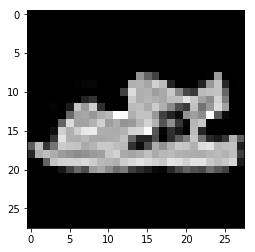

In [9]:
##FAZENDO UMA PREDIÇÃO

#Define um valor aleatório
index = randint(1, x_test.shape[0])
#Redimensiona um elemento dodataset de tste para possuir 4 dimensoes
to_predict = x_test[index].reshape(1, x_test.shape[1], x_test.shape[2], x_test.shape[3])
#Faz a predição
prediction = model.predict(to_predict)
#classe verdadeira --------> predição da rede
print(class_names[argmax(y_test[index])],  "------>", class_names[argmax(prediction)])
#Imagem do elemeto sendo testado
plt.imshow(to_predict.reshape(x_test.shape[1], x_test.shape[2]), 'gray')

In [10]:
#Imprime os nomes das camadas do modelo
j = 0
for i in model.layers:
    print(j, ' - ', i.name)
    j += 1

0  -  conv2d_1
1  -  activation_1
2  -  conv2d_2
3  -  activation_2
4  -  max_pooling2d_1
5  -  dropout_1
6  -  conv2d_3
7  -  activation_3
8  -  max_pooling2d_2
9  -  flatten_1
10  -  dense_1
11  -  activation_4
12  -  dropout_2
13  -  dense_2
14  -  activation_5
15  -  dropout_3
16  -  dense_3
17  -  activation_6
18  -  dropout_4
19  -  dense_4
20  -  activation_7


In [11]:
#Define um elemento com os outputs
layer_outputs = [layer.output for layer in model.layers[1:] ]
#Cria um modelo que retorna os outputs de cada camada dados os inputs do modelo
from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [12]:
#Cria uma lista de arrays com as ativacoes da camada desejada para cada elemento do test dataset
layer = 17
patterns = []
for data in x_test:
    data = data.reshape(1, data.shape[0], data.shape[1], data.shape[2])
    patterns.append(activation_model.predict(data)[layer][0])

5 x 5


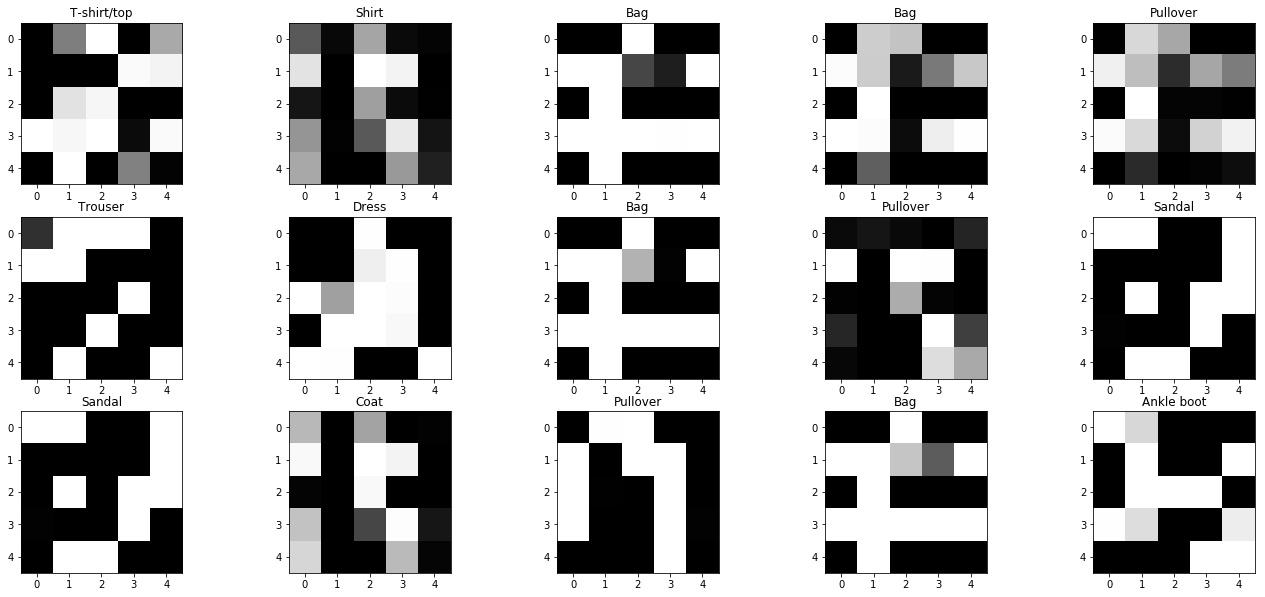

In [13]:
#Plota os padroes de ativação dos 'num_prints' elementos aleatorios da lista de padroes 
import numpy as np
num_prints = 15
j = 1;
k = 1;
np.random.seed(42)
for i in range(num_prints):
    num = int(np.random.randint(len(patterns)))
    to_plot = patterns[num]
    dim = int(np.sqrt(len(to_plot)))
    to_plot = to_plot.reshape((dim, dim))
    f_min, f_max = np.amin(to_plot), np.amax(to_plot)
    to_plot = (to_plot - f_min) / (f_max - f_min)
    plt.subplot(num_prints, 5, j)
    j += 1
    k+= 1
    plt.imshow(to_plot, cmap='gray')
    plt.title(class_names[argmax(y_test[num])])
    #print(class_names[argmax(y_test[num])])
print(dim, 'x', dim)
plt.subplots_adjust(left=0, bottom=0, right=3, top=10, wspace=0.2, hspace=0.2)
plt.show()   